In [3]:
import matplotlib.pyplot as plt; import matplotlib.ticker as ticker
import numpy as np
import scipy
from scipy.optimize import curve_fit
plt.rc('xtick',labelsize=20); plt.rc('ytick',labelsize=20)
plt.rcParams['figure.figsize'] = (13,5)

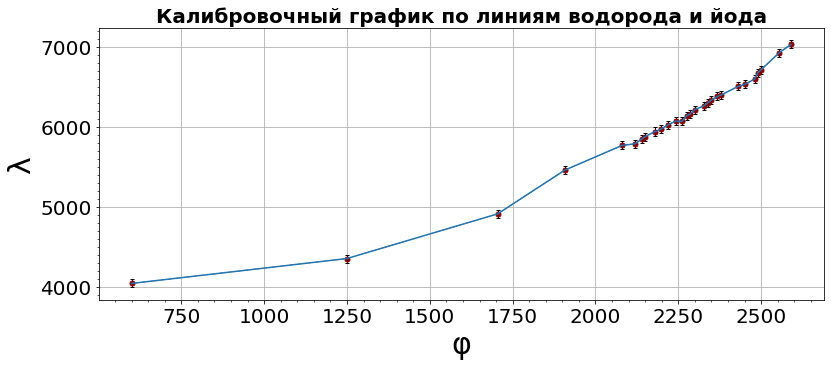

In [28]:
ax = plt.axes()
ax.xaxis.set_minor_locator(ticker.MultipleLocator(50));
ax.yaxis.set_minor_locator(ticker.MultipleLocator(100));

x=[600,1250,1705,1907,2080,2120,2140,2150,2180,2198,2220,2242,2260,2276,2286,2300,2328,2340,2349,2368,2380,2430,2450,2480,2490,2500,2555,2590]
y=[4047,4358,4916,5461,5770,5791,5852,5881,5944,5975,6030,6074,6069,6143,6163,6217,6266,6304,6334,6382,6402,6506,6532,6598,6678,6717,6929,7032]

xerror=0
yerror=50

plt.errorbar(x,y, yerr=yerror, xerr=xerror, ecolor='black', elinewidth=1, capsize=2)

plt.plot(x,y, 'o--', color='darkred', lw= 0.7, ms= 5 )

plt.title('Калибровочный график по линиям водорода и йода', fontdict={'fontweight':'bold'},size=20)
plt.xlabel('φ',size=30)
plt.ylabel('λ',size=30)

plt.grid()

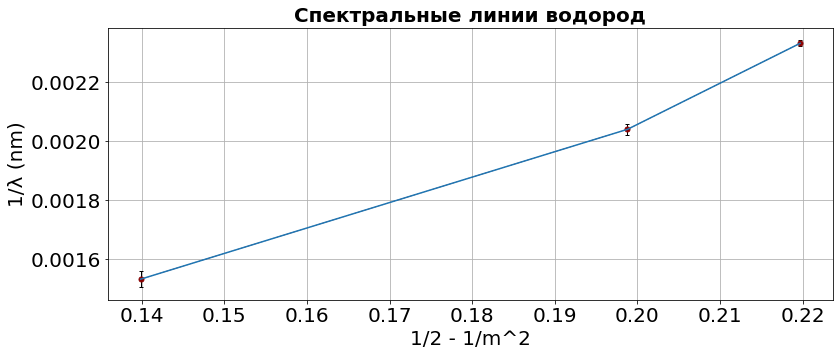

In [31]:
ax = plt.axes()
ax.xaxis.set_minor_locator(ticker.MultipleLocator(50));
ax.yaxis.set_minor_locator(ticker.MultipleLocator(100));

x1=[0.139890,0.198790,0.219678]
y1=[0.001533,0.002040,0.002331]

x1error=[0,0,0]
y1error=[0.000028, 0.000019,0.00001]

plt.errorbar(x1,y1,xerr=x1error, yerr=y1error, ecolor='black', elinewidth=1, capsize=2)
plt.plot(x1,y1, 'o--', color='darkred', lw= 0.7, ms= 5 )

plt.title('Спектральные линии водород', fontdict={'fontweight':'bold'},size=20)
plt.xlabel('1/2 - 1/m^2',size=20)
plt.ylabel('1/λ (nm)',size=20)

plt.grid()

In [19]:
H = [1940,2600,3600]

H_exp = [round(f(H[2-j],*fit_mercury)/10,1) for j in range(len(H))]
H_teor = [656.3,486.1,434.1]
n = [3,4,5]
dH = [round(100*abs(H_exp[j] - H_teor[j])/H_teor[j],2) for j in range(len(H_exp))]

R = [int(10**7/(H_exp[j]*(0.25 - 1/((n[j])**2)))) for j in range(len(H))]
##cm

In [20]:
import pandas as pd
th_props = [
  ('font-size', '20px')
  ]

td_props = [
  ('font-size', '16px')
  ]

styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

data = {'n':n,r'$λ_{Экс.}$':H_exp,r'$λ$(nm)':H_teor,r'$\frac{Δλ}{λ}$(%)':dH,r'$R_{H}$(cm)':R}
df = pd.DataFrame(data,index=[r"$H_{α}$",r"$H_{β}$",r"$H_{γ}$"])
df = df.style.set_table_styles(styles)
display(df)

,n,$λ_{Экс.}$,$λ$(nm),$\frac{Δλ}{λ}$(%),$R_{H}$(cm)
$H_{α}$,3,652,656.3,0.66,110429
$H_{β}$,4,490.3,486.1,0.86,108776
$H_{γ}$,5,429.4,434.1,1.08,110896


## Серия Бальмера
$\LARGE \frac{1}{λ} = R_{H}(\frac{1}{2^{2}} - \frac{1}{n^{2}})$

$\LARGE R_{H экс.} = 11000 \pm 1100 cm $ <br>
$\LARGE R_{H} = 109737 cm $<br>
$\large Погрешность \approx 0.3\% $

In [21]:
Rh = int(np.mean(R))
from statistics import stdev 
s = int(round(stdev(R),0))
#print(Rh,s)
RH = 109737
#print(abs(100*(RH-Rh)/RH))

# Спектр йода

In [22]:
I = [3550,3500,2840]

I_exp1 = [round(f(I[j],*fit_mercury)/10,1) for j in range(len(I))]
I_exp2 = [round(f(I[j],*fit_neon)/10,1) for j in range(len(I))]
#print(I_exp1)
#print(I_exp2)
I_exp = [round((I_exp1[j]+I_exp2[j])/2,1) for j in range(len(I))]
#print(I_exp)
c = 299792458
h = 6.62 * 10**(-34)
e = 1.602 * 10**(-19)
hv = [round(c*h/(e*j*10**(-9)),3) for j in I_exp]

In [23]:
data = {'$λ_{mercury}$':I_exp1,'$λ_{neon}$':I_exp2,'$λ_{ср.}$':I_exp,'hν(eV)':hv}
df = pd.DataFrame(data,index=['1','1.5','гр.'])
df = df.style.set_table_styles(styles)
display(df)

,$λ_{mercury}$,$λ_{neon}$,$λ_{ср.}$,hν(eV)
1,641.9,657.3,649.6,1.907
1.5,632,644,638,1.942
гр.,521.4,522.3,521.8,2.374


## Энергия колебательного кванта возбуждённого состояния молекулы йода:
$\Large hν_{2} = (hν_{1.5} - hν_{1,0})/5 \approx 0.007eV$

In [24]:
hv2 = (hv[1]-hv[0])/5
hv1 = 0.027
E = 0.94

hve = 2.37 - 0.69
print(hve)

1.6800000000000002


При частотах $ν < ν_{эл}$ молекула не поглощает свет, вследствие чего в этой области спектр поглощения полностью совпадает со спектром используемого источника света. В диапазоне частот  $ν > ν_{гр}$ поглощение света связано с диссоциацией молекулы, в результате чего спектр полощения молекулы становится сплошным. Следовательно энергия диссоциации в возбуждённом состоянии:<br>

$\Large D_{2} = hν_{гр} - hν_{эл}$

если известна энергия возбуждения E атома йода, то энергию диссоциации молекулы йода в основном состоянии $D_{1}$ можно найти :<br>

$\Large hv_{гр} = hν_{эл} + D_{2} = D_{1} + E$<br>
$\Large hv_{гр} \approx 2.37eV $ <br>
$\Large E = 0.94eV; D_{1} = 1.54eV; D_{2} = 0.69eV$<br>
$\Large hv_{эл} \approx 1.68eV $